In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.spatial import ConvexHull
from matplotlib.animation import FuncAnimation, PillowWriter

import warnings 

warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("baza1.csv", sep = ",")

In [3]:
# drop - usuwa kolumny
df1.drop(['life_exp', 'gdp', 'co2_consump'], axis=1, inplace=True)
df2 = df1[df1["year"] == 2017]
df3 = df2[df2["continent"] == "Oceania"] 

In [4]:
df2

,country,continent,year,hdi_index,services
19,Afghanistan,Asia,2017,0.506,38.0
40,Albania,Europe,2017,0.790,42.5
61,Algeria,Africa,2017,0.745,59.2
82,Angola,Africa,2017,0.582,41.8
103,Argentina,South America,2017,0.843,77.5
...,...,...,...,...,...
3589,Vanuatu,Oceania,2017,0.601,28.8
3610,Vietnam,Asia,2017,0.696,34.1
3631,Yemen,Asia,2017,0.467,60.6
3652,Zambia,Africa,2017,0.578,38.6


In [5]:
swiat = []
for (i, j) in zip(df2['hdi_index'], df2['services']):
    swiat.append((i,j))
swiat = np.array(swiat)

In [6]:
oceania = []
for (i, j) in zip(df3['hdi_index'], df3['services']):
    oceania.append((i,j))
oceania = np.array(oceania)

In [7]:
powloka = ConvexHull(oceania)

In [8]:
indeksy = powloka.vertices

In [9]:
punktyPowloki = oceania[indeksy, :]

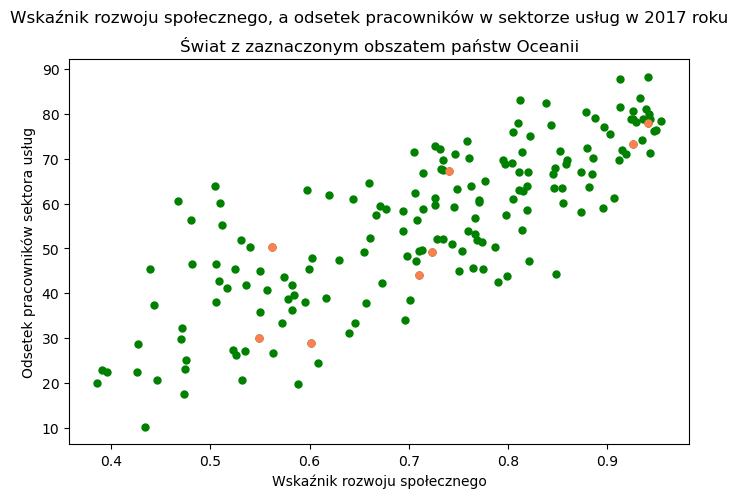

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

def animuj(i):
    ax.clear()
    plt.suptitle("Wskaźnik rozwoju społecznego, a odsetek pracowników w sektorze usług w 2017 roku")
    ax.set_title("Świat z zaznaczonym obszatem państw Oceanii")
    ax.plot(swiat[:,0], swiat[:,1], 'o', markersize=5, color="green", zorder=0)
    ax.plot(oceania[:,0], oceania[:,1], 'o', markersize=5, color="coral", zorder=2)
    ax.fill(punktyPowloki[:,0], punktyPowloki[:,1], color="lightcoral", fill=True, edgecolor="white", alpha=i/50, zorder=1)
    ax.set_xlabel('Wskaźnik rozwoju społecznego')
    ax.set_ylabel('Odsetek pracowników sektora usług')

ani = FuncAnimation(fig, animuj, frames=50, interval=50)
ani.save('zad6_Agata_Jastrzebska_281633.gif', dpi=100, writer=PillowWriter(fps=10))